# Autograd

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mitchell-Mirano/sorix/blob/main/docs/learn/basics/03-autograd.ipynb)
[![Open in GitHub](https://img.shields.io/badge/Open%20in-GitHub-black?logo=github)](https://github.com/Mitchell-Mirano/sorix/blob/main/docs/learn/basics/03-autograd.ipynb)
[![Open in Docs](https://img.shields.io/badge/Open%20in-Docs-blue?logo=readthedocs)](https://mitchell-mirano.github.io/sorix/latest/learn/basics/03-autograd/)

## The Loss Function

In **machine learning**, the *loss function* $ J(\mathbf{w}) $ quantifies how well a model with parameters $ \mathbf{w} $ fits the data. Formally, it maps the model’s predictions and the true target values to a single real number that measures the discrepancy between them.

A smaller value of $ J(\mathbf{w}) $ indicates better model performance, while large values signal poor predictions. Because learning consists of adjusting the parameters so that the model improves, **training a model is equivalent to solving an optimization problem**:

$$
\min_{\mathbf{w}} J(\mathbf{w})
$$

### Why the loss function becomes difficult to minimize

In realistic models, especially neural networks, $ J(\mathbf{w}) $ is not a simple curve but a **high-dimensional surface** defined over potentially millions of parameters. Each parameter contributes a dimension, which means:

* The surface is extremely complex and non-linear.
* The gradient $ \nabla J(\mathbf{w}) $ contains one partial derivative per parameter.
* The equations $\frac{\partial J}{\partial \mathbf{w}} = 0$ form a massive coupled system that cannot be solved analytically.

Patterns such as curvature, ridges, valleys, flat regions, and local minima make the surface far too intricate for direct algebraic minimization.

For instance, even writing the stationary condition explicitly:
$$
\nabla J(\mathbf{w}) = 0
$$

produces a system of tens of thousands (or millions) of equations with the same number of unknowns—something mathematically intractable to solve in closed form.


### Why Iterative Methods Are Required

Because analytic solutions are impossible for high-dimensional, non-linear loss surfaces, we use **iterative numerical optimization methods**. These methods do not attempt to solve the system of equations directly. Instead, they **progressively update** the parameter vector:

$$
\mathbf{w}_0 \rightarrow \mathbf{w}_1 \rightarrow \mathbf{w}_2 \rightarrow \cdots
$$

moving step-by-step toward regions where $ J(\mathbf{w})$  decreases.

Among these iterative methods, the most fundamental and widely used is **Gradient Descent**.


## The Gradient Descent Method

Gradient Descent is a **first-order** optimization algorithm used to find the local minimum of a function. It is based on the principle that the direction of **maximum increase** of a function at a point is the direction of the **gradient vector** ($\nabla f$).

Therefore, the direction of **maximum decrease** is the **opposite** of the gradient ($-\nabla f$).

### Algorithm Steps

1. **Initialization:** Choose a random initial point $\mathbf{w}_0 $ on the cost function surface $J(\mathbf{w}) $.

2. **Gradient Calculation:** At the current point $\mathbf{w}_t $, compute the gradient $\nabla J(\mathbf{w}_t)$.

3. **Parameter Update:** Move the parameters in the direction opposite to the gradient, using the update rule:

   $$
   \mathbf{w}_{t+1} = \mathbf{w}_t - \eta \cdot \nabla J(\mathbf{w}_t)
   $$

   Where:

   * $ \mathbf{w}_{t+1} $ is the new set of parameters (weights).
   * $ \mathbf{w}_t $ is the current set of parameters.
   * $ \nabla J(\mathbf{w}_t) $ is the gradient (vector of partial derivatives) of the cost function at $ \mathbf{w}_t $.
   * **$ \eta $** is the **learning rate**. This is a crucial hyperparameter controlling the size of the “step” toward the minimum.

   * If $ \eta $ is too large, the algorithm may **overshoot the minimum** (divergence).
   * If $ \eta $ is too small, convergence becomes very slow.

4. **Convergence:** This process is repeated **iteratively** (epochs) until the update steps become negligible (i.e., the gradient approaches zero) or a maximum number of iterations is reached, indicating that a local minimum has been found.


## Sorix’s Automatic Differentiation Engine

Sorix provides a fully automated mechanism for computing derivatives through its autograd engine, removing the need to compute gradients manually—an essential capability for optimization methods such as Gradient Descent.

At the core of this system is the **Tensor**, Sorix’s fundamental data structure. While it behaves similarly to a NumPy array, a Tensor can also build a **Computational Graph** when initialized with `requires_grad=True`. From that moment, every arithmetic or functional operation is recorded as nodes and edges in the graph, capturing both the intermediate values and the dependencies between them.

When the `.backward()` method is invoked, Sorix traverses this graph in reverse, applying the chain rule to compute the gradients of the output with respect to all Tensors that participated in the computation. This automatic differentiation process makes any function expressed through Sorix Tensors differentiable, enabling efficient and accurate gradient-based optimization without explicitly defining derivative formulas.


In [1]:
# Uncomment the next line and run this cell to install sorix
#!pip install 'sorix @ git+https://github.com/Mitchell-Mirano/sorix.git@main/docs_learn/docs_learn/docs_learn/docs_learn'

## Example: Finding the Minimum of $f(x, y) = x^2 + y^2$

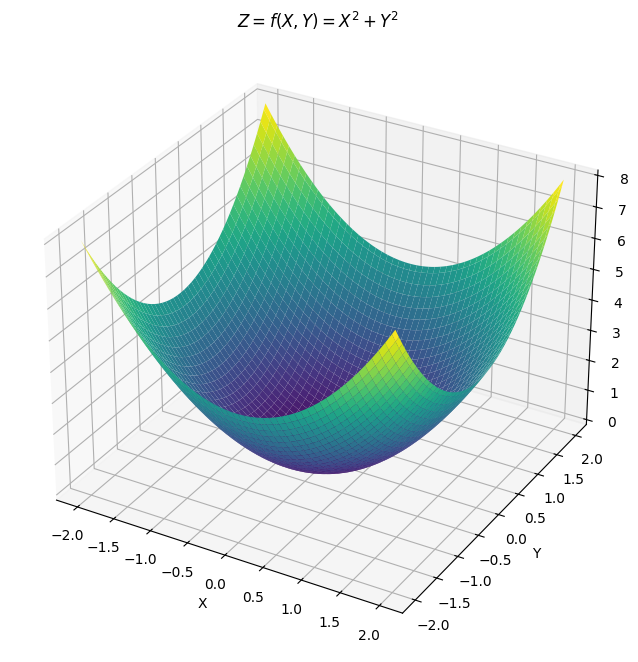

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)

X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(r'$Z=f(X,Y) = X^2 + Y^2$')
plt.show()

### Algebraic Search for the Minimum (Critical Points)

A critical point is any point where the gradient of the function is zero:

$$
\nabla f = \mathbf{0}.
$$

Computing the partial derivatives:

$$
\frac{\partial f}{\partial x} = 2x = 0 \quad \Rightarrow \quad x = 0,
$$
$$
\frac{\partial f}{\partial y} = 2y = 0 \quad \Rightarrow \quad y = 0.
$$

Thus, the only critical point is $(0,0)$. Evaluating the function there confirms it is the global minimum:

$$
f(0,0)=0.
$$

This direct solution is possible because $f(x,y)$ is simple, convex, and differentiable everywhere.



## **Finding the Minimum of $ f(x,y)=x^2+y^2 $ with Gradient Descent**

The gradient descent update rule is:

$$
(x,y)_{t+1} = (x,y)_t - \eta \nabla f(x,y), \qquad t=0,1,2,\dots,n.
$$

$$
(x,y)_{t+1} = (x,y)_t - 2\eta(x,y)_t, \qquad t=0,1,2,\dots,n.
$$

Given:

* Initial point: $ (x,y)_0 = (3,4) $
* Learning rate($lr$): $ \eta = 0.1 $

the algorithm progressively moves the parameters toward the origin, decreasing the value of the function at each step.




In [3]:
from sorix import tensor

# Gradient descent hyperparameters
lr = 0.1
iters = 50

# Initial variables
x = tensor([3.0], requires_grad=True)
y = tensor([4.0], requires_grad=True)

# Initial computation
f = x**2 + y**2
f.backward()

dx0 = x.grad.item()
dy0 = y.grad.item()

print("Iter |     x    |     y    |  df/dx   |  df/dy   |   f(x,y)")
print("--------------------------------------------------------------------")
print(f"{0:4d} | {x.item():8.4f} | {y.item():8.4f} | {dx0:8.4f} | {dy0:8.4f} | {f.item():9.4f}")

# Cleanup before loop
x.grad = 0
y.grad = 0

for i in range(1, iters + 1):

    # Forward compute f(x,y)
    f = x**2 + y**2

    # Backward compute df/dx and df/dy
    f.backward()
    
    dx = x.grad
    dy = y.grad

    # Update x and y values
    x -= lr * x.grad
    y -= lr * y.grad

    # Periodic print
    if i % 5 == 0:
        print(f"{i:4d} | {x.item():8.4f} | {y.item():8.4f} | {dx.item():8.4f} | {dy.item():8.4f} | {f.item():9.4f}")

    # Reset
    x.grad = 0
    y.grad = 0

# Final result
f_final = x**2 + y**2
print("\nFinal result:")
print(f"x = {x.item():.6f}")
print(f"y = {y.item():.6f}")
print(f"f(x,y) = {f_final.item():.6f}")


Iter |     x    |     y    |  df/dx   |  df/dy   |   f(x,y)
--------------------------------------------------------------------
   0 |   3.0000 |   4.0000 |   6.0000 |   8.0000 |   25.0000
   5 |   0.9830 |   1.3107 |   2.4576 |   3.2768 |    4.1943
  10 |   0.3221 |   0.4295 |   0.8053 |   1.0737 |    0.4504
  15 |   0.1056 |   0.1407 |   0.2639 |   0.3518 |    0.0484
  20 |   0.0346 |   0.0461 |   0.0865 |   0.1153 |    0.0052
  25 |   0.0113 |   0.0151 |   0.0283 |   0.0378 |    0.0006
  30 |   0.0037 |   0.0050 |   0.0093 |   0.0124 |    0.0001
  35 |   0.0012 |   0.0016 |   0.0030 |   0.0041 |    0.0000
  40 |   0.0004 |   0.0005 |   0.0010 |   0.0013 |    0.0000
  45 |   0.0001 |   0.0002 |   0.0003 |   0.0004 |    0.0000
  50 |   0.0000 |   0.0001 |   0.0001 |   0.0001 |    0.0000

Final result:
x = 0.000043
y = 0.000057
f(x,y) = 0.000000


## Graphically

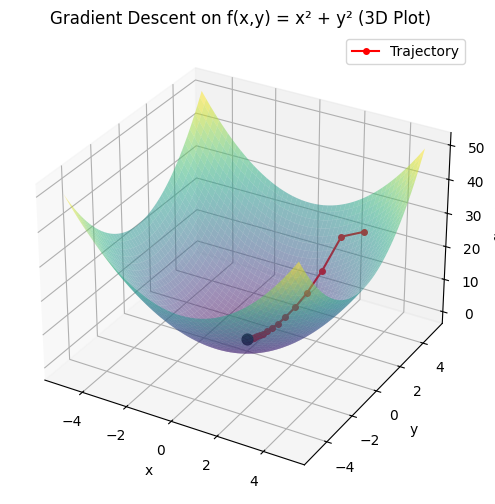

In [4]:
from sorix import tensor
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Gradient descent hyperparameters
lr = 0.1
iters = 50

# Initial variables
x = tensor([3.0], requires_grad=True)
y = tensor([4.0], requires_grad=True)
f = x**2 + y**2

# History for plotting
xs = [x.item()]
ys = [y.item()]
fs = [f.item()]

# Initial evaluation
f.backward()

# Initial reset
x.grad = 0
y.grad = 0

for i in range(1, iters + 1):

    # Forward
    f = x**2 + y**2

    # Backward
    f.backward()

    # Update
    x -= lr * x.grad
    y -= lr * y.grad

    # Save trajectory
    xs.append(x.item())
    ys.append(y.item())
    fs.append(f.item())

    # Reset gradients
    x.grad = 0
    y.grad = 0

# -----------------------------
# 3D plot of the surface + trajectory
# -----------------------------
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Surface f(x,y) = x^2 + y^2
X = np.linspace(-5, 5, 200)
Y = np.linspace(-5, 5, 200)
XX, YY = np.meshgrid(X, Y)
ZZ = XX**2 + YY**2

ax.plot_surface(XX, YY, ZZ, alpha=0.5, cmap='viridis')

# Gradient descent trajectory
ax.plot(xs, ys, fs, marker='o', color='red', markersize=4, label="Trajectory")

# Final point
ax.scatter(xs[-1], ys[-1], fs[-1], color='black', s=60)

ax.set_title("Gradient Descent on f(x,y) = x² + y² (3D Plot)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.legend()

plt.show()


### Explanation of the Gradient Descent Plot

The plot depicts the iterative behavior of gradient descent applied to $f(x,y)=x^{2}+y^{2}$. The surface represents the values of $f(x,y)$ over the plane, forming a convex paraboloid in which elevated regions correspond to larger function values and the lowest point at the center corresponds to the global minimum at $(0,0)$.

The red trajectory shows the sequence of iterates $(x_t,y_t)$. It begins at $(3.0,4.0)$, located on a high region of the surface where $f(x,y)$ is large. At each step, the algorithm updates the variables in the direction opposite to the gradient, producing a monotonic descent toward smaller values of $f(x,y)$. The initial segments are long because the gradient is large in steep regions, while the steps progressively shorten as the iterates approach the origin, where the surface becomes flatter and the gradient diminishes. The trajectory follows an almost radial path, reflecting the symmetry of the function.

The final point lies essentially at $(0,0)$, indicating convergence to the global minimum where $f(x,y)=0$.
